I took data that I used for Linear Regression and SVR to see if I can improve metrics

# Load data 

In [1]:
# the usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn import metrics

In [2]:
# load data
df = pd.read_csv("newsalarydata.csv")

In [3]:
df.head()

,Age,Gender,Years of Experience,Salary,Bachelors,Masters,Job Title Cluster
0,32.0,1,5.0,90000.0,1,0,27
1,28.0,0,3.0,65000.0,0,1,24
2,45.0,1,15.0,150000.0,0,0,4
3,36.0,0,7.0,60000.0,1,0,49
4,52.0,1,20.0,200000.0,0,1,9


# X/y split and model

In [4]:
# x/y split
X = df.drop('Salary', axis=1)
y = df['Salary']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
# make a model
model = make_pipeline(RandomForestRegressor())
model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

# Metrics and Analysis

In [7]:
predictions = model.predict(X_test)

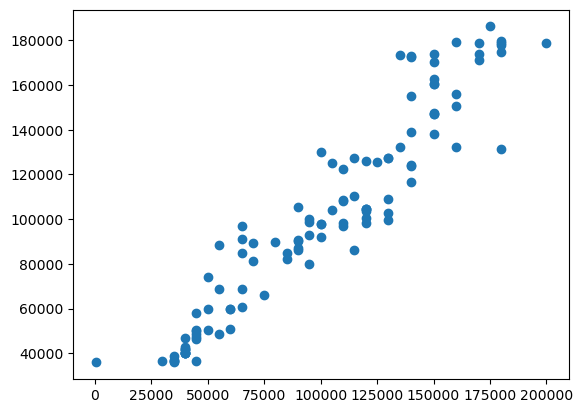

In [8]:
# these values follow a line = good predictions
plt.scatter(y_test, predictions)
plt.show()

# plot is better than in SVR project

In [9]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

# SVR metrics
# MAE 17854.02
# MSE 676983236.61 ^2
# RMSE: 26018.9
# R-squared: 0.69

# metrics are better than in SVR

# Liner regression metrics
# MAE 11193.55
# MSE 226453280.28 ^2
# RMSE: 15048.36
# R-squared: 0.9

# Random forest perfoms better than Linear Regression and SVR

MAE
10507.47

MSE
221485566.11

RMSE:
14882.39

R-squared:
0.9
